# <b> Decision Trees </b>

- One of the most popular and oldest machine learning models.
- Both a classification and regression supervised model.
- Intuitive. Very obvious why it's called "Decision Trees." 
- Foundation is asking a series of questions designed to zero-in on the classification. Sound familiar?
- Gateway model to more complex models such as Random Forests and Gradient Boosting.

## Lesson Objectives
- Interpret a tree diagram
- Explain how a decision tree is created
- Build a decision tree model in scikit-learn

## Visualize a Decision Tree

What makes Decision Trees great is that you can see the process in how it determines a classification.

Below is a decision tree trained on data from the 2008 Democratic primary. It is predicting whether or not a county voted for Hillary Clinton or Barack Obama based on demographics and other features.

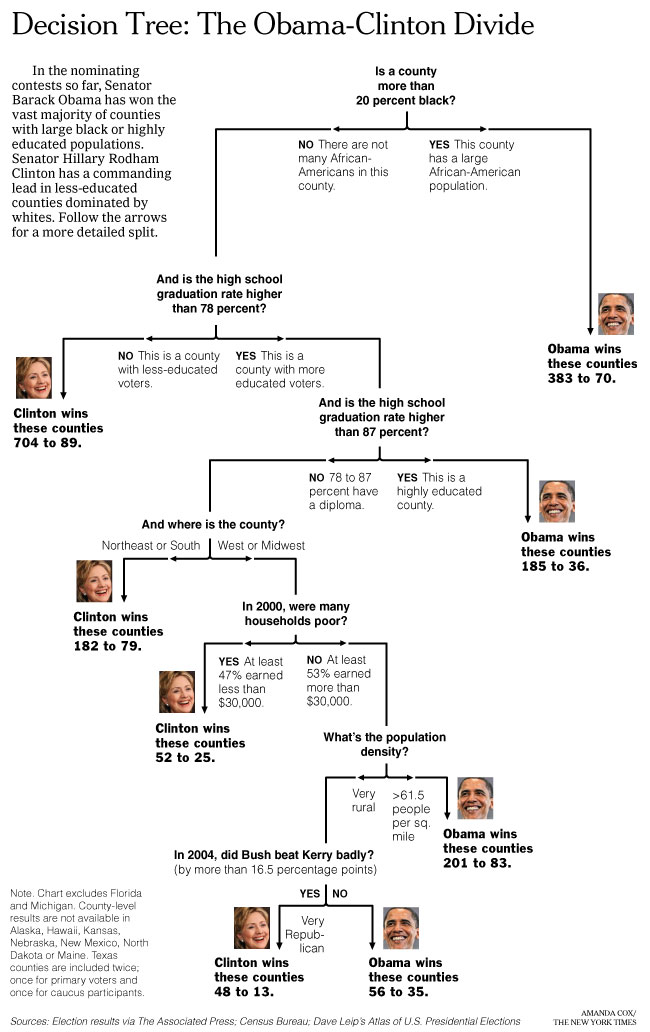

In [1]:
from IPython.display import Image
Image(filename='obama_clinton_tree.jpg') 

The first split is "County > 20% Black Population". When a splitting rule is <b>True</b>, the model follows the right branch and when the splitting rule is <b>False</b>, it follows the left branch.

For counties that are > 20% black, the branch ends. This means that the model would classify any county with a >20% black population as "Obama" because the majority of counties that meet this condition voted for Obama.
However, for counties that do not meet this condition, the decision tree continues to make more decisions.

In [32]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
from sklearn.tree import DecisionTreeClassifier

In [40]:
df = pd.read_csv("dt_data.csv", index_col=0)

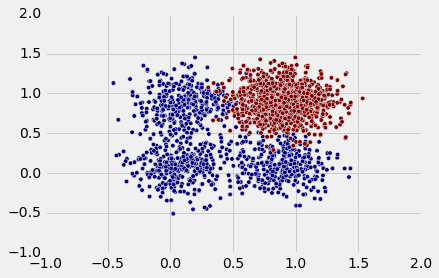

In [41]:
plt.scatter(df.feature_one, df.feature_two, c=df.target);

In [61]:

def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, alpha=0.4)
X = df.drop("target", axis=1)
y = df.target

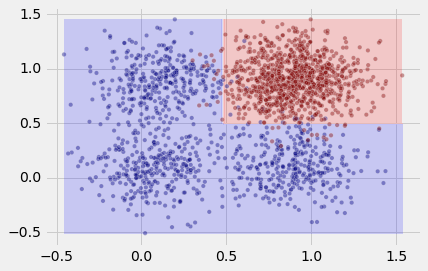

In [67]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X,y)
plot_decision_boundary(model, X.values, y.values);

In [104]:
from sklearn.datasets import load_iris
iris = load_iris()

In [111]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [118]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

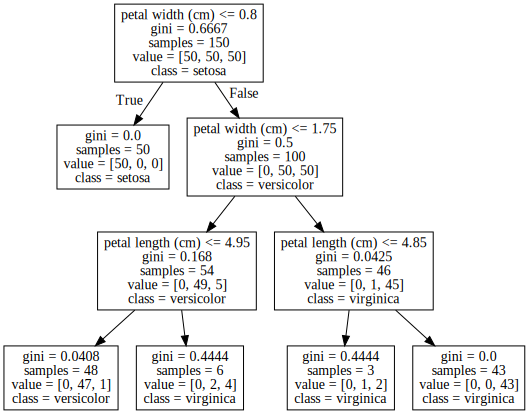

In [119]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(clf, out_file='iris.dot', 
                    feature_names=X.columns, 
                    class_names=iris.target_names)
with open("iris.dot") as f: 
        dot_graph = f.read()
graphviz.Source(dot_graph)